# Sales Analysis

In this project we use Python Pandas & Python Matplotlib to analyze and answer business questions about 12 months worth of sales data. The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost, purchase address, etc. 

We start by cleaning our data. Tasks during this section include:
- Drop NaN values from DataFrame
- Removing rows based on a condition
- Change the type of columns (to_numeric, to_datetime, astype)

Once we have cleaned up our data a bit, we move the data exploration section. In this section we explore 5 high level business questions related to our data:
- What was the best month for sales? How much was earned that month?
- What city sold the most product?
- What time should we display advertisemens to maximize the likelihood of customer’s buying product?
- What products are most often sold together?
- What product sold the most? Why do you think it sold the most?

To answer these questions we walk through many different pandas & matplotlib methods. They include:
- Concatenating multiple csvs together to create a new DataFrame (pd.concat)
- Adding columns
- Parsing cells as strings to make new columns (.str)
- Using the .apply() method
- Using groupby to perform aggregate analysis
- Plotting bar charts and lines graphs to visualize our results
- Labeling our graphs

#### Import necessary libraries

In [47]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

#### Merge data from each month into one CSV

In [77]:
path = "\Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])

all_months_data.to_csv("all_data_raw.csv", index=False)    
all_months_data.to_csv("all_data.csv", index=False)

#### Read in updated dataframe

In [49]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,177083,Lightning Charging Cable,1,14.95,04/25/22 23:32,"646 Avenue Franklin Roosevelt St, Mons, HAI 7000"
1,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2,177084,AA Batteries (4-pack),1,3.84,04/13/22 18:57,"694 Avenue des Arts St, Bruxelles, BRU 1000"
3,177085,Bose SoundSport Headphones,1,99.99,04/03/22 18:24,"228 Avenue de la Toison d'Or St, Bruxelles, BR..."
4,177086,USB-C Charging Cable,1,11.95,04/10/22 16:41,"120 Avenue Franklin Roosevelt St, Mons, HAI 7000"


In [50]:
all_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,163654,163654,163654,163654,163654,163654
unique,156731,20,10,24,124721,103474
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,328,19231,147958,19231,328,328


In [51]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164105 entries, 0 to 164104
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          163654 non-null  object
 1   Product           163654 non-null  object
 2   Quantity Ordered  163654 non-null  object
 3   Price Each        163654 non-null  object
 4   Order Date        163654 non-null  object
 5   Purchase Address  163654 non-null  object
dtypes: object(6)
memory usage: 7.5+ MB


### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

##### Drop rows of NAN

In [52]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
562,NaN,NaN,NaN,NaN,NaN,NaN
945,NaN,NaN,NaN,NaN,NaN,NaN
1118,NaN,NaN,NaN,NaN,NaN,NaN
1183,NaN,NaN,NaN,NaN,NaN,NaN
1211,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,177083,Lightning Charging Cable,1,14.95,04/25/22 23:32,"646 Avenue Franklin Roosevelt St, Mons, HAI 7000"
1,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2,177084,AA Batteries (4-pack),1,3.84,04/13/22 18:57,"694 Avenue des Arts St, Bruxelles, BRU 1000"
3,177085,Bose SoundSport Headphones,1,99.99,04/03/22 18:24,"228 Avenue de la Toison d'Or St, Bruxelles, BR..."
4,177086,USB-C Charging Cable,1,11.95,04/10/22 16:41,"120 Avenue Franklin Roosevelt St, Mons, HAI 7000"


##### Get rid of text in order date column

In [53]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### Make columns correct type

In [54]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Augment data with additional columns

#### Add month column

In [55]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int64')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,177083,Lightning Charging Cable,1,14.95,04/25/22 23:32,"646 Avenue Franklin Roosevelt St, Mons, HAI 7000",4
2,177084,AA Batteries (4-pack),1,3.84,04/13/22 18:57,"694 Avenue des Arts St, Bruxelles, BRU 1000",4
3,177085,Bose SoundSport Headphones,1,99.99,04/03/22 18:24,"228 Avenue de la Toison d'Or St, Bruxelles, BR...",4
4,177086,USB-C Charging Cable,1,11.95,04/10/22 16:41,"120 Avenue Franklin Roosevelt St, Mons, HAI 7000",4
5,177087,Apple Airpods Headphones,1,150.00,04/06/22 20:33,"342 Rue Antoine Dansaert St, Liège, WLG 4000",4


#### Add month column (alternative method)

In [56]:
all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2
0,177083,Lightning Charging Cable,1,14.95,04/25/22 23:32,"646 Avenue Franklin Roosevelt St, Mons, HAI 7000",4,4
2,177084,AA Batteries (4-pack),1,3.84,04/13/22 18:57,"694 Avenue des Arts St, Bruxelles, BRU 1000",4,4
3,177085,Bose SoundSport Headphones,1,99.99,04/03/22 18:24,"228 Avenue de la Toison d'Or St, Bruxelles, BR...",4,4
4,177086,USB-C Charging Cable,1,11.95,04/10/22 16:41,"120 Avenue Franklin Roosevelt St, Mons, HAI 7000",4,4
5,177087,Apple Airpods Headphones,1,150.00,04/06/22 20:33,"342 Rue Antoine Dansaert St, Liège, WLG 4000",4,4


#### Add city column

In [57]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City
0,177083,Lightning Charging Cable,1,14.95,04/25/22 23:32,"646 Avenue Franklin Roosevelt St, Mons, HAI 7000",4,4,Mons (HAI)
2,177084,AA Batteries (4-pack),1,3.84,04/13/22 18:57,"694 Avenue des Arts St, Bruxelles, BRU 1000",4,4,Bruxelles (BRU)
3,177085,Bose SoundSport Headphones,1,99.99,04/03/22 18:24,"228 Avenue de la Toison d'Or St, Bruxelles, BR...",4,4,Bruxelles (BRU)
4,177086,USB-C Charging Cable,1,11.95,04/10/22 16:41,"120 Avenue Franklin Roosevelt St, Mons, HAI 7000",4,4,Mons (HAI)
5,177087,Apple Airpods Headphones,1,150.00,04/06/22 20:33,"342 Rue Antoine Dansaert St, Liège, WLG 4000",4,4,Liège (WLG)


## Data Exploration!

#### Question 1: What was the best month for sales? How much was earned that month? 

In [58]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [59]:
all_data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Month 2,Sales
Month,,,,
1,16685,2753992.71,14824,2771528.17
2,16709,2742253.84,29734,2758181.93
3,8659,1440394.94,23121,1449060.90
4,11976,1986753.47,42564,1997054.26
5,8991,1477201.85,40005,1484359.03
6,20584,3285593.50,109674,3305228.51
7,12914,2141160.06,80514,2152163.82
8,5265,893161.23,37528,897853.91
9,12647,2116798.01,101484,2130288.81


range(1, 13)


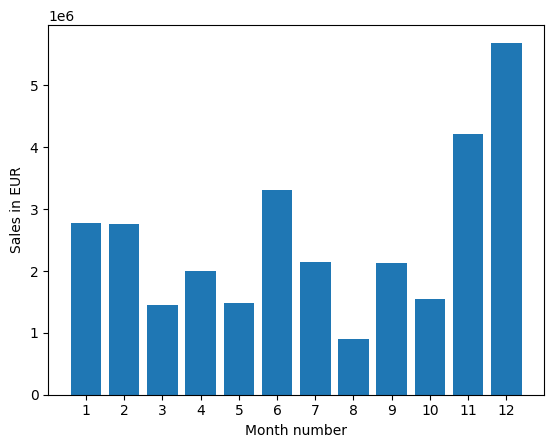

In [60]:
months = range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in EUR')
plt.xlabel('Month number')
plt.show()

#### Question 2: What city sold the most product?

In [61]:
all_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Month 2,Sales
City,,,,,
Bruxelles (BRU),57252,9445026.24,367161,367161,9502914.13
Charleroi (WHT),23167,3874008.90,147688,147688,3896838.86
Courtrai (WVH),11280,1860097.18,72701,72701,1871171.74
La Louvière (WHT),11563,1918865.76,73998,73998,1929893.82
Liège (WLG),23164,3761674.08,149006,149006,3781764.64
Mons (HAI),11351,1874144.56,73159,73159,1884483.48
Mouscron (HAI),11394,1865228.36,74168,74168,1877620.23
Namur (NAM),11621,1901514.48,73550,73550,1914429.41
Tournai (HAI),11480,1883703.85,74329,74329,1894015.82


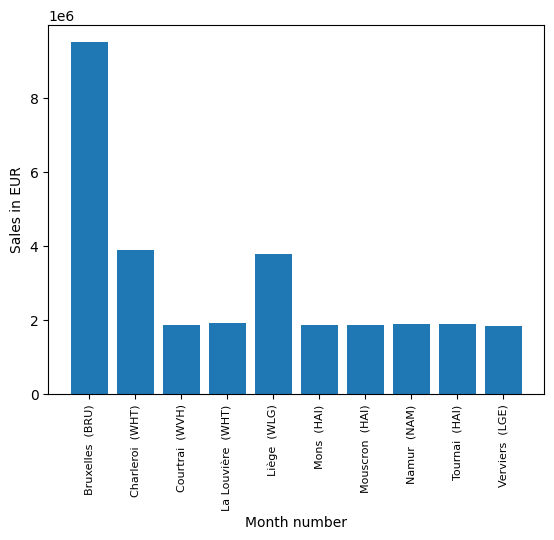

In [62]:
keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in EUR')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [63]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City,Sales,Hour,Minute,Count
0,177083,Lightning Charging Cable,1,14.95,04/25/22 23:32,"646 Avenue Franklin Roosevelt St, Mons, HAI 7000",4,4,Mons (HAI),14.95,23,32,1
2,177084,AA Batteries (4-pack),1,3.84,04/13/22 18:57,"694 Avenue des Arts St, Bruxelles, BRU 1000",4,4,Bruxelles (BRU),3.84,18,57,1
3,177085,Bose SoundSport Headphones,1,99.99,04/03/22 18:24,"228 Avenue de la Toison d'Or St, Bruxelles, BR...",4,4,Bruxelles (BRU),99.99,18,24,1
4,177086,USB-C Charging Cable,1,11.95,04/10/22 16:41,"120 Avenue Franklin Roosevelt St, Mons, HAI 7000",4,4,Mons (HAI),11.95,16,41,1
5,177087,Apple Airpods Headphones,1,150.00,04/06/22 20:33,"342 Rue Antoine Dansaert St, Liège, WLG 4000",4,4,Liège (WLG),150.00,20,33,1


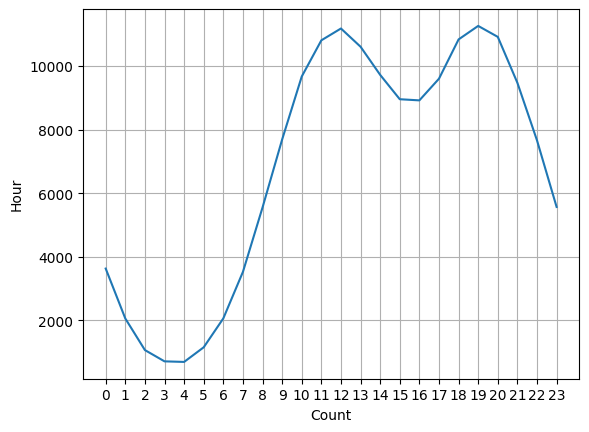

In [64]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.ylabel('Hour')
plt.xlabel('Count')
plt.grid()
plt.show()

# My recommendation is slightly before 7am or 8pm

#### Question 4: What products are most often sold together?

In [65]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

In [66]:
count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable') 887
('iPhone', 'Lightning Charging Cable') 857
('iPhone', 'Wired Headphones') 395
('Google Phone', 'Wired Headphones') 356
('Vareebadd Phone', 'USB-C Charging Cable') 353
('iPhone', 'Apple Airpods Headphones') 262
('Google Phone', 'Bose SoundSport Headphones') 200
('Vareebadd Phone', 'Wired Headphones') 146
('USB-C Charging Cable', 'Wired Headphones') 140
('Lightning Charging Cable', 'Wired Headphones') 102


#### What product sold the most? Why do you think it sold the most?

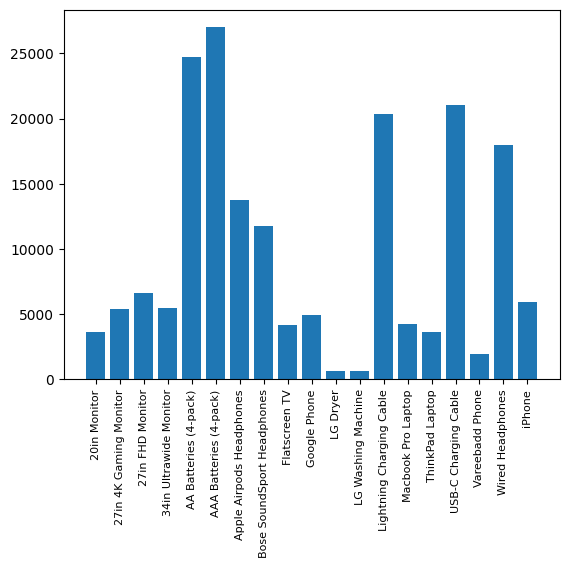

In [67]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

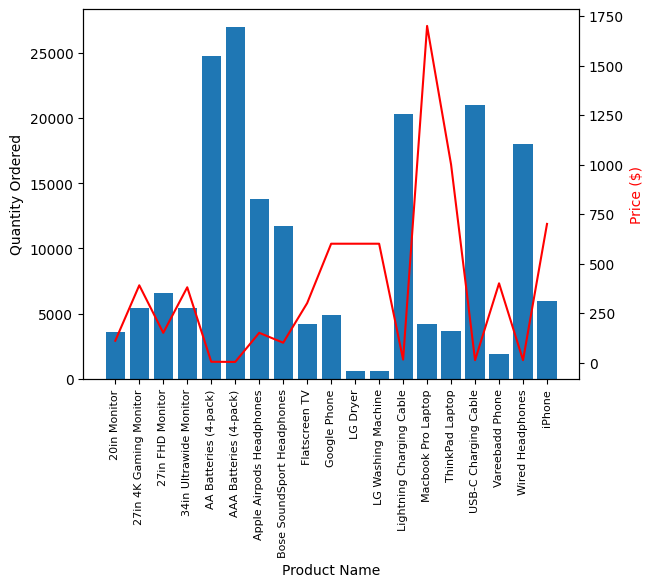

In [76]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered)
ax2.plot(keys, prices, color='r')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price ($)', color='r')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()